# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv("C:/Users/thiag/EBAC/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [20]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)


,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [19]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [25]:
#Seu código aqui
df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False)

estatisticas = (df.groupby('Categoria')['Preco_Normal'].agg(['mean', 'median', 'std']) .sort_values(by='std', ascending=False)  .reset_index())
print(estatisticas)

                    Categoria         mean  median          std
0                     lacteos  2385.219239   989.0  3925.816164
1  belleza-y-cuidado-personal  1783.556485  1569.0  2210.041719
2                  congelados  2108.042553  1519.0  2111.539896
3          comidas-preparadas  3095.043478  3290.0  2019.911428
4                      frutas  1724.473684  1195.0  1639.151114
5        instantaneos-y-sopas   765.491228   439.0  1170.232869
6                    verduras  1343.296875  1180.0  1012.699625


## No caso com maior desvio padrão (dos lacteos) podemos observar que a media e mediana divergem bastante de valor. Provavelmente porque a media tende a ser distorcida pela presença de outliers enquanto a mediana parmanece mais proxima dos valores 'centrais' 

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

# sim, conforme demostrava os dados, há a presença de diversos outliers nessa categoria


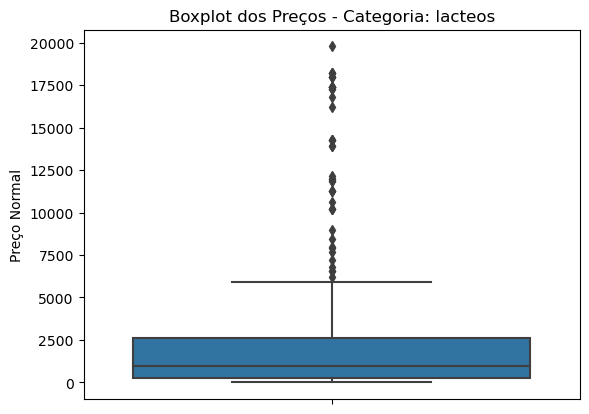

In [28]:
#Seu código aqui
import seaborn as sns
import matplotlib.pyplot as plt

dados_lacteos = df.loc[df['Categoria'] == 'lacteos']

sns.boxplot(data=dados_lacteos, y='Preco_Normal')
plt.title('Boxplot dos Preços - Categoria: lacteos')
plt.ylabel('Preço Normal')
plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

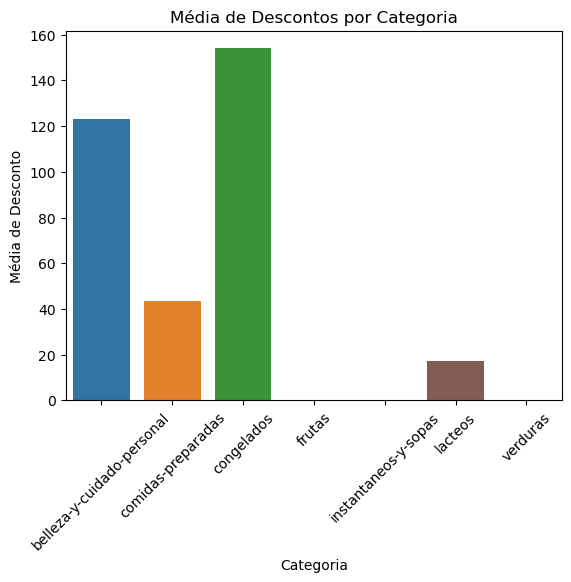

In [33]:
# Seu código aqui

media_descontos = df.groupby('Categoria')['Desconto'].mean().reset_index()


sns.barplot(data=media_descontos, x='Categoria', y='Desconto')
plt.title('Média de Descontos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto')
plt.xticks(rotation=45)  
plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [51]:
import pandas as pd
import plotly.express as px
df = df.dropna(subset=['Categoria', 'Marca', 'Desconto'])

#tirei os nulos para melhorar o grafico

media_descontos = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

fig = px.bar(
    media_descontos,
    x='Desconto',       
    y='Marca',         
    color='Categoria',  
    orientation='h',   
    title='Média de Descontos por Categoria e Marca',
    labels={'Desconto': 'Média de Desconto', 'Marca': 'Marca'},  
    width=800,          
    height=600         
)

fig.show()



